In [1]:
using Pkg
Pkg.add("Plots")
using Plots

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


## Plots 
* metapaquete que une varios backends de gráficos bajo ua misma API única
* la idea es poder swappear backends de forma fácil

#### Plotly


In [2]:
plotly() 
plot(rand(5,5),linewidth=2,title="My Plot")

<!DOCTYPE html>
 
 
 Plots.jl

#### Matplotlib de python
Cambiar de backend es muy simple

 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


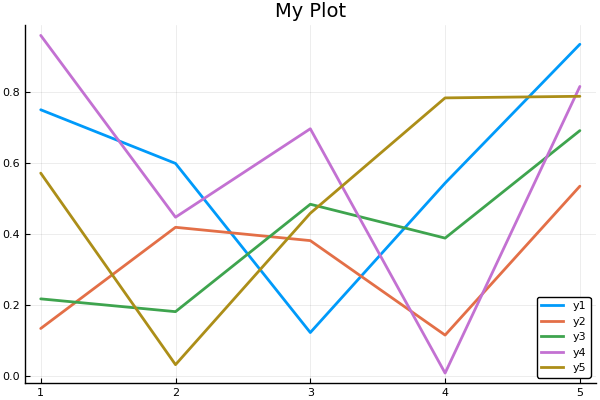

In [4]:
Pkg.add("PyPlot") 
pyplot() 
plot(rand(5,5),linewidth=2,title="My Plot") 

## Gadfly
* Librería de visualización
* Codeado en Julia
* Inspirado por el libro ‘The Grammar of Graphics’
* Pensado para usar con Data Frames

In [1]:
using Pkg
Pkg.add("Gadfly")
using Gadfly

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


In [2]:
using RDatasets

In [3]:
iris = dataset("datasets", "iris")


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


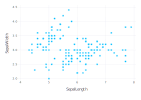

In [4]:
plot(iris, x=:SepalLength, y=:SepalWidth)

### Arrays
* no es obligatorio trabajar con DataFrames
* tenemos una firma alternativa de plot que nos permita usar directamente arrays

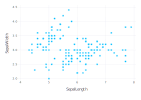

In [5]:
SepalLength = iris[:SepalLength]
SepalWidth = iris[:SepalWidth]
plot(x=SepalLength, y=SepalWidth, Geom.point,
     Guide.xlabel("SepalLength"), Guide.ylabel("SepalWidth"))


#### Identificando Especies
le damos color a cada data point usando la especie de la flor que figura en el dataset


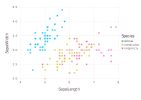

In [7]:
plot(iris, x=:SepalLength, y=:SepalWidth, color=:Species, Geom.point)


Automáticamente elige una paleta agradable de colores y genera una leyenda

## Escalas
Podemos cambiar la escala a los datos para gráficar de manera trivial

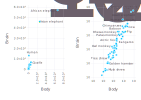

In [8]:
mammals = dataset("MASS", "mammals")
p1 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label)
p2 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label,
     Scale.x_log10, Scale.y_log10)
hstack(p1, p2)

 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
  [31c24e10] + Distributions v0.19.2
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


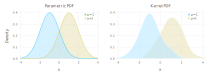

In [10]:
Pkg.add("Distributions")
using Distributions
set_default_plot_size(21cm, 8cm)
x = -4:0.1:4
Da = [DataFrame(x=x, ymax=pdf.(Normal(μ),x), ymin=0.0, u="μ=$μ") for μ in [-1,1]]
Db = [DataFrame(x=randn(200).+μ, u="μ=$μ") for μ in [-1,1]]

p1 = plot(vcat(Da...), x=:x, y=:ymax, ymin=:ymin, ymax=:ymax, color=:u,
    Geom.line, Geom.ribbon, Guide.ylabel("Density"), Theme(alphas=[0.6]),
    Guide.colorkey(title="", pos=[2.5,0.6]), Guide.title("Parametric PDF")
)
p2 = plot(vcat(Db...), x=:x, color=:u, Theme(alphas=[0.6]),
    Stat.density(bandwidth=0.5), Geom.polygon(fill=true, preserve_order=true),
    Coord.cartesian(xmin=-4, xmax=4, ymin=0, ymax=0.4),
    Guide.colorkey(title="", pos=[2.5,0.6]), Guide.title("Kernel PDF")
)
hstack(p1,p2)

 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
  [a81c6b42] + Compose v0.7.4
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


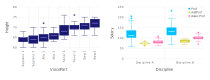

In [12]:
Pkg.add("Compose")
using Compose
set_default_plot_size(21cm, 8cm)
singers, salaries = dataset("lattice", "singer"), dataset("car","Salaries")
salaries.Salary /= 1000.0
salaries.Discipline = ["Discipline $(x)" for x in salaries.Discipline]
p1 = plot(singers, x=:VoicePart, y=:Height, Geom.boxplot,
    Theme(default_color="MidnightBlue"))
p2 = plot(salaries, x=:Discipline, y=:Salary, color=:Rank,
    Scale.x_discrete(levels=["Discipline A", "Discipline B"]),
    Geom.boxplot, Theme(boxplot_spacing=0.1cx),
    Guide.colorkey(title="", pos=[0.78w,-0.4h])
)
hstack(p1, p2)